In [22]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Replace 'your_data.csv' with the actual file path
csv_file_path = '/Users/julianesler/Downloads/czoradiationmodified.csv'

# Read CSV into DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame to check if the import was successful
df


,Year,Month,Day,Hour,GHI
0,2021,1,1,0,2
1,2021,1,1,1,0
2,2021,1,1,2,0
3,2021,1,1,3,0
4,2021,1,1,4,0
...,...,...,...,...,...
8755,2021,12,31,19,483
8756,2021,12,31,20,520
8757,2021,12,31,21,463
8758,2021,12,31,22,340


In [14]:
# Group by "Month" and "Day" columns and aggregate values into lists
grouped_df = df.groupby(['Month', 'Hour'])['GHI'].agg(list).reset_index()

# Create a new DataFrame "gdfh" (gdfh = grouped data frame, hour) with the desired structure
gdfh = pd.DataFrame({
    'MonthL': grouped_df['Month'],
    'HourL': grouped_df['Hour'],
    'GHI_list': grouped_df['GHI']
})

# Display the new DataFrame "gdfh"
gdfh

,MonthL,HourL,GHI_list
0,1,0,"[2, 17, 22, 22, 25, 28, 30, 32, 26, 29, 34, 44..."
1,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
283,12,19,"[578, 572, 571, 566, 565, 404, 344, 327, 95, 2..."
284,12,20,"[549, 546, 546, 542, 518, 368, 363, 395, 53, 4..."
285,12,21,"[461, 460, 460, 456, 456, 377, 366, 320, 63, 3..."
286,12,22,"[323, 323, 322, 319, 319, 258, 253, 162, 35, 2..."


In [12]:
gdfh['GHI_daily_avg'] = gdfh['GHI_list'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

gdfh

,MonthL,HourL,GHI_list,GHI_daily_avg
0,1,0,"[2, 17, 22, 22, 25, 28, 30, 32, 26, 29, 34, 44...",39.193548
1,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
2,1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
3,1,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
4,1,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000
...,...,...,...,...
283,12,19,"[578, 572, 571, 566, 565, 404, 344, 327, 95, 2...",404.290323
284,12,20,"[549, 546, 546, 542, 518, 368, 363, 395, 53, 4...",420.483871
285,12,21,"[461, 460, 460, 456, 456, 377, 366, 320, 63, 3...",379.483871
286,12,22,"[323, 323, 322, 319, 319, 258, 253, 162, 35, 2...",254.774194


In [11]:
alpha_df = gdfh.groupby(['MonthL'])['GHI_daily_avg'].agg(list).reset_index()

# Create a new DataFrame "gdf" with the desired structure
agdf = pd.DataFrame({
    'Month': alpha_df['MonthL'],
    'GHI': alpha_df['GHI_daily_avg']
})
agdf

,Month,GHI
0,1,"[39.193548387096776, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2,"[121.57142857142857, 4.964285714285714, 0.0, 0..."
2,3,"[235.6451612903226, 42.03225806451613, 0.0, 0...."
3,4,"[329.06666666666666, 112.83333333333333, 1.7, ..."
4,5,"[394.83870967741933, 186.3548387096774, 26.580..."
5,6,"[419.23333333333335, 222.4, 60.733333333333334..."
6,7,"[386.16129032258067, 191.51612903225808, 49.83..."
7,8,"[340.51612903225805, 149.51612903225808, 13.0,..."
8,9,"[227.8, 50.733333333333334, 0.0, 0.0, 0.0, 0.0..."
9,10,"[83.48387096774194, 0.5806451612903226, 0.0, 0..."


In [10]:
data_spread = pd.DataFrame(agdf['GHI'].tolist(), columns=range(1, 25))

# Transpose the DataFrame to have hours as columns and months as rows
data_spread = data_spread.T

# Rename the columns with month names
data_spread.columns = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Display the new DataFrame "data_spread"
data_spread

,January,February,March,April,May,June,July,August,September,October,November,December
1,39.193548,121.571429,235.645161,329.066667,394.838710,419.233333,386.161290,340.516129,227.800000,83.483871,15.566667,5.483871
2,0.000000,4.964286,42.032258,112.833333,186.354839,222.400000,191.516129,149.516129,50.733333,0.580645,0.000000,0.000000
3,0.000000,0.000000,0.000000,1.700000,26.580645,60.733333,49.838710,13.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [57]:
ds = data_spread

dsdf = pd.DataFrame(ds.sum()).reset_index()
dsdf["avg"]=dsdf[0]
dsdf['month']=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
dsdf

,index,0,avg,month
0,January,2997.387097,2997.387097,Jan
1,February,4172.821429,4172.821429,Feb
2,March,5409.580645,5409.580645,Mar
3,April,7355.166667,7355.166667,Apr
4,May,7964.645161,7964.645161,May
5,June,8404.966667,8404.966667,Jun
6,July,7802.935484,7802.935484,Jul
7,August,7230.032258,7230.032258,Aug
8,September,5791.033333,5791.033333,Sept
9,October,4716.967742,4716.967742,Oct


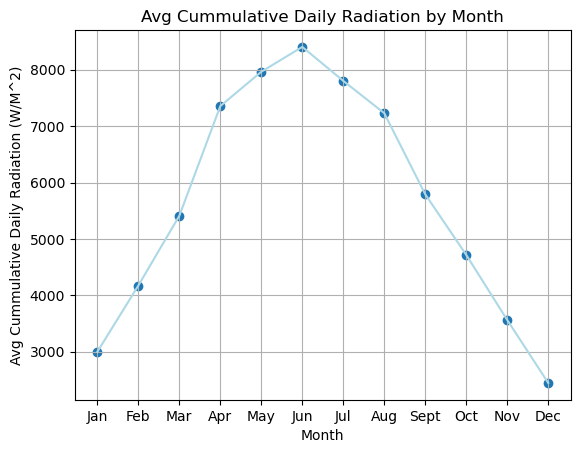

In [74]:
plt.scatter(dsdf.index,dsdf.avg)

plt.title('Avg Cummulative Daily Radiation by Month')
plt.xlabel('Month')
plt.ylabel('Avg Cummulative Daily Radiation (W/M^2)')
plt.grid(True)
plt.plot(dsdf.month,dsdf.avg,'lightblue')

plt.xticks(dsdf.month)
plt.show()

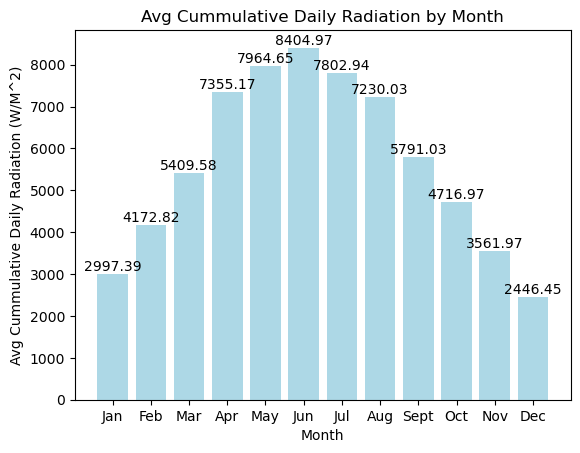

In [75]:
plt.bar(dsdf.month,dsdf.avg,color='lightblue')

plt.title('Avg Cummulative Daily Radiation by Month')
plt.xlabel('Month')
plt.ylabel('Avg Cummulative Daily Radiation (W/M^2)')

for i, value in enumerate(dsdf.avg):
    plt.text(dsdf.month[i], value + 0.1, round(value, 2), ha='center', va='bottom')